In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Import the data
data = pd.read_csv("FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#Describe the data
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
newData = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
newData.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


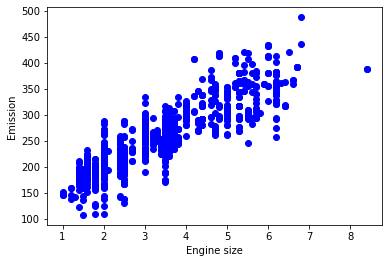

In [6]:
plt.scatter(newData.ENGINESIZE, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

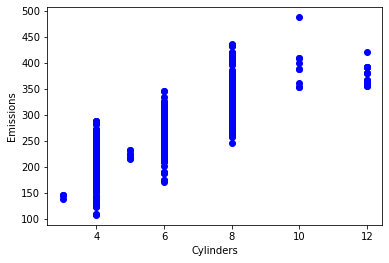

In [7]:
plt.scatter(newData.CYLINDERS, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

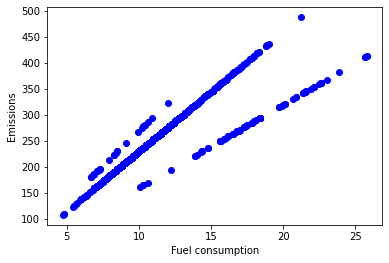

In [8]:
plt.scatter(newData.FUELCONSUMPTION_COMB, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption")
plt.ylabel("Emissions")
plt.show()

In [9]:
#Train and Test split
msk = np.random.rand(len(data)) < 0.8
train = newData[msk]
test = newData[~msk]

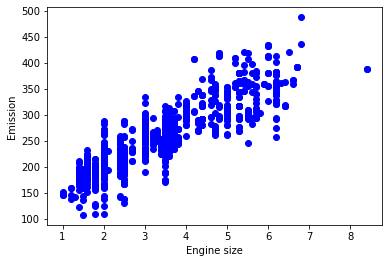

In [10]:
#Plot the scatter plots for the train data set
plt.scatter(newData.ENGINESIZE, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

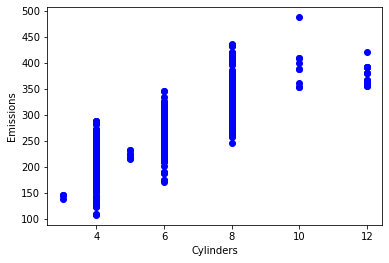

In [11]:
plt.scatter(newData.CYLINDERS, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

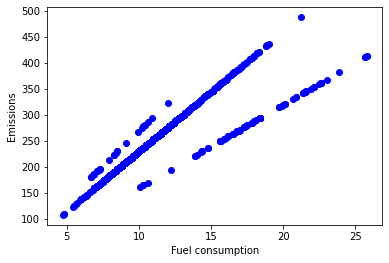

In [12]:
plt.scatter(newData.FUELCONSUMPTION_COMB, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption")
plt.ylabel("Emissions")
plt.show()

In [17]:
#MULTIPLE REGRESSION MODEL
from sklearn import linear_model
mul_regression = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
mul_regression.fit(x, y)
#The coefficients
print("Coefficients: ", mul_regression.coef_)

Coefficients:  [[11.00301236  7.53275824  9.61863701]]


In [20]:
#Predictions
y_hat = mul_regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
#Explained variance score: 1 is perfect pridiction
print('Variance score: %.2f' % mul_regression.score(x, y))

Residual sum of squares: 551.17
Variance score: 0.86


In [21]:
#EXERCISE PROBLEMS
newData2 = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
newData2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [22]:
msk = np.random.rand(len(data)) < 0.8
train = newData2[msk]
test = newData2[~msk]


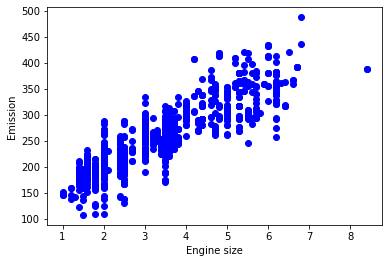

In [23]:
#The scatter plots
plt.scatter(newData2.ENGINESIZE, newData2.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

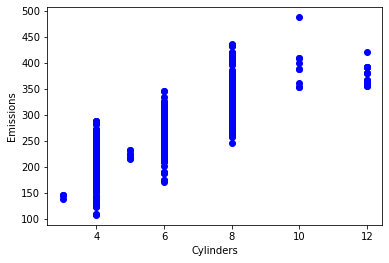

In [25]:
plt.scatter(newData2.CYLINDERS, newData2.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

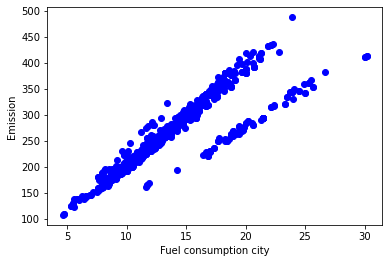

In [27]:
plt.scatter(newData2.FUELCONSUMPTION_CITY, newData2.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption city")
plt.ylabel("Emission")
plt.show()

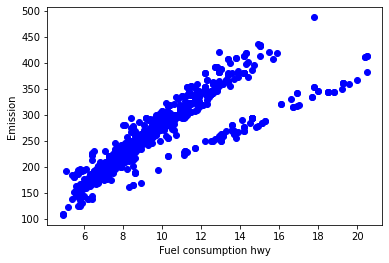

In [28]:
plt.scatter(newData2.FUELCONSUMPTION_HWY, newData.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption hwy")
plt.ylabel("Emission")
plt.show()

In [34]:
#Model #2
mul_regression2 = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
mul_regression2.fit(x, y)
#The coefficients
print("Coefficients: ", mul_regression2.coef_)

Coefficients:  [[10.03801035  7.85240111  5.92482582  3.51117134]]


In [36]:
y_hat = mul_regression2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
#EXPLAINED VARIANCE SCORE: 1 IS PERFECT PRDICTION
print('Variance score: %.2f' %mul_regression2.score(x, y))

Residual sum of squares: 666.02
Variance score: 0.85
